# 📑 &nbsp; Deep Learning. Practice Project 1_0: Neural Networks for Regression
<a href='https://olgabelitskaya.gitlab.io/index.html'>&#x1F300; &nbsp; Homepage &nbsp; &nbsp;</a>
<a href='https://olgabelitskaya.gitlab.io/deep_learning_projects/index.html'>&#x1F300; &nbsp; Project List &nbsp; &nbsp;</a>
<a href='https://olgabelitskaya.github.io/README.html'>&#x1F300; &nbsp; GitHub Pages &nbsp; &nbsp;</a>
<a href='https://www.instagram.com/olga.belitskaya/'>&#x1F300; &nbsp; Instagram Posts &nbsp; &nbsp;</a>
<a href='https://www.pinterest.ru/olga_belitskaya/code-style/'>&#x1F300; &nbsp; Pinterest Posts</a><br/>

In this project, we'll evaluate the performance and predictive power of neural networks in the sphere of regression tasks. 

Models will be trained and tested on data collected from homes in suburbs of Boston, Massachusetts.

Origin: This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University.

Creators: Harrison, D. and Rubinfeld, D.L.

Data Set Information: Concerns housing values in suburbs of Boston.

In [1]:
#@title Attributes
from IPython.display import display,HTML
display(HTML("""
<style>
@import 'https://fonts.googleapis.com/css?family=Akronim|Ruthie';
</style>
<table style='width:80%; background-color:black; 
              font-family:Ruthie; font-size:200%;'>
<tr style='color:white; font-family:Akronim;'>
  <th>Attribute</th><th>Description</th></tr>
<tr><td style='color:#F898C8;'><center>CRIM</center></td>
  <td style='color:#F898C8;'>
    <left>per capita crime rate by town</left></td></tr>
<tr><td style='color:#E91E63;'><center>ZN</center></td>
  <td style='color:#E91E63;'>
    <left>proportion of residential land zoned for lots over 25,000 sq.ft.
    </left></td></tr>
<tr><td style='color:#D62518;'><center>INDUS</center></td>
  <td style='color:#D62518;'>
    <left>proportion of non-retail business acres per town
    </left></td></tr>
<tr><td style='color:#AD0000;'><center>CHAS</center></td>
  <td style='color:#AD0000;'>
    <left>Charles River dummy variable (1 if tract bounds river; 0 otherwise)
    </left></td></tr>
<tr><td style='color:#FA7A00;'><center>NOX</center></td>
  <td style='color:#FA7A00;'>
    <left>nitric oxides concentration (parts per 10 million)
    </left></td></tr> 
<tr><td style='color:#FED85D;'><center>RM</center></td>
  <td style='color:#FED85D;'>
    <left>average number of rooms per dwelling</left></td></tr> 
<tr><td style='color:#91E351;'><center>AGE</center></td>
  <td style='color:#91E351;'>
    <left>proportion of owner-occupied units built prior to 1940
    </left></td></tr> 
<tr><td style='color:#00D8A0;'><center>DIS</center></td>
  <td style='color:#00D8A0;'>
    <left>weighted distances to five Boston employment centres
    </left></td></tr> 
<tr><td style='color:#1CAC78;'><center>RAD</center></td>
  <td style='color:#1CAC78;'>
    <left>index of accessibility to radial highways</left></td></tr>
<tr><td style='color:#004C71;'><center>TAX</center></td>
  <td style='color:#004C71;'>
    <left>full-value property-tax rate per 10,000 USD</left></td></tr>
<tr><td style='color:#1AADE0;'><center>PTRATIO</center></td>
  <td style='color:#1AADE0;'>
    <left>pupil-teacher ratio by town</left></td></tr>
<tr><td style='color:#0069BD;'><center>B</center></td>
  <td style='color:#0069BD;'>
    <left>1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    </left></td></tr>
<tr><td style='color:#333399;'><center>LSTAT</center></td>
  <td style='color:#333399;'>
    <left>% lower status of the population</left></td></tr> 
<tr><td style='color:#7851A9;'><center>MEDV</center></td>
  <td style='color:#7851A9;'>
    <left>Median value of owner-occupied homes in 1000 USD</left></td></tr>
</table>"""))

Attribute,Description
CRIM,per capita crime rate by town
ZN,"proportion of residential land zoned for lots over 25,000 sq.ft."
INDUS,proportion of non-retail business acres per town
CHAS,Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX,nitric oxides concentration (parts per 10 million)
RM,average number of rooms per dwelling
AGE,proportion of owner-occupied units built prior to 1940
DIS,weighted distances to five Boston employment centres
RAD,index of accessibility to radial highways
TAX,"full-value property-tax rate per 10,000 USD"


The Boston housing data was collected in 1978 and each of the 

506 entries represents aggregated data about 14 features for homes from various suburbs.
## ✒️ &nbsp;Step 0. Code Modules & Helpful Functions


In [2]:
import sqlite3,seaborn as sn,pylab as pl
import tensorflow as tf,pandas as pd,numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets,linear_model,svm
from sklearn.metrics import mean_squared_error,median_absolute_error,\
mean_absolute_error,r2_score,explained_variance_score
from sklearn.tree import DecisionTreeRegressor,ExtraTreeRegressor
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor,\
AdaBoostRegressor,GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor,RadiusNeighborsRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,\
QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.kernel_ridge import KernelRidge
from sklearn.cross_decomposition import PLSRegression
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import WhiteKernel,RationalQuadratic,RBF
from sklearn.semi_supervised import LabelPropagation,LabelSpreading
from sklearn.isotonic import IsotonicRegression
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.callbacks import \
ModelCheckpoint,EarlyStopping,ReduceLROnPlateau
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense,LSTM,\
GlobalAveragePooling1D,Activation,Flatten,Dropout,BatchNormalization,\
Conv1D,MaxPooling1D,GlobalMaxPooling1D,PReLU,LeakyReLU

In [3]:
def connect2db(dbf):
    connection=None
    try:
        connection=sqlite3.connect(dbf)
        if connection is not None: 
            cursor=connection.cursor()
        return connection,cursor
    except Error as err:
        print(err)
        if connection is not None: 
            connection.close()
conn,cur=connect2db('boston.db')

In [4]:
def history_plot(fit_history,n):
    keys=list(fit_history.history.keys())[0:4]
    pl.figure(figsize=(12,8)); pl.subplot(211)
    pl.plot(fit_history.history[keys[0]][n:],
            color='slategray',label='train')
    pl.plot(fit_history.history[keys[2]][n:],
            color='#348abd',label='valid')
    pl.xlabel('epochs'); pl.ylabel('loss')
    pl.legend(); pl.title('loss function')      
    pl.subplot(212)
    pl.plot(fit_history.history[keys[1]][n:],
            color='slategray',label='train')
    pl.plot(fit_history.history[keys[3]][n:],
            color='#348abd',label='valid')
    pl.xlabel('epochs'); pl.ylabel('mae')    
    pl.legend(); pl.title('mean absolute error')
    pl.tight_layout(); pl.show()

In [5]:
def predict_plot(y,y_mlp,y_cnn,y_rnn,ti):
    pl.figure(figsize=(12,6))
    pl.scatter(range(n),y[:n],marker='*',s=100,
               color='black',label='real data')
    pl.plot(y_mlp[:n],label='mlp')
    pl.plot(y_cnn[:n],label='cnn')
    pl.plot(y_rnn[:n],label='rnn')
    pl.xlabel('data points')
    pl.ylabel('predicted and real target values')
    pl.legend(); pl.title(ti); pl.show()

 ## ✒️ &nbsp;Step 1. Data Loading

In [6]:
boston_data=datasets.load_boston()
columns=boston_data.feature_names
boston_df=pd.DataFrame(boston_data.data,columns=columns)
boston_df['MEDV']=boston_data.target
boston_df.to_sql('main',con=conn,if_exists='replace')
boston_df.head(7)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9


In [7]:
pearson=boston_df.corr(method='pearson')
corr_with_prices=pearson.iloc[-1][:-1]
pd.DataFrame(
    corr_with_prices[abs(corr_with_prices).argsort()[::-1]])

,MEDV
LSTAT,-0.737663
RM,0.695360
PTRATIO,-0.507787
INDUS,-0.483725
TAX,-0.468536
NOX,-0.427321
CRIM,-0.388305
RAD,-0.381626
AGE,-0.376955
ZN,0.360445


In [8]:
pd.read_sql_query('''
SELECT ZN,
       AVG(LSTAT),
       AVG(RM),
       AVG(PTRATIO),
       AVG(INDUS),
       AVG(TAX)
FROM main
GROUP BY ZN;
''',con=conn).set_index('ZN').head(7)

,AVG(LSTAT),AVG(RM),AVG(PTRATIO),AVG(INDUS),AVG(TAX)
ZN,,,,,
0.0,14.447366,6.147922,19.057796,13.542231,449.182796
12.5,15.802000,5.945100,16.310000,7.330000,321.200000
17.5,8.050000,7.104000,18.600000,1.380000,216.000000
18.0,4.980000,6.575000,15.300000,2.310000,296.000000
20.0,7.691429,7.160190,14.695238,4.560000,245.095238
21.0,9.147500,6.146750,16.800000,5.640000,243.000000
22.0,8.291000,6.482400,19.100000,5.860000,330.000000


In [9]:
n=int(51)
(x_train,y_train),(x_test,y_test)=boston_housing.load_data()
x_valid,y_valid=x_test[:n],y_test[:n]
x_test,y_test=x_test[n:],y_test[n:]
pd.DataFrame([['training feature`s shape:',x_train.shape],
              ['training target`s shape:',y_train.shape],
              ['validating feature`s shape:',x_valid.shape],
              ['validating target`s shape:',y_valid.shape],
              ['testing feature`s shape:',x_test.shape],
              ['testing target`s shape',y_test.shape]])

,0,1
0,training feature`s shape:,"(404, 13)"
1,training target`s shape:,"(404,)"
2,validating feature`s shape:,"(51, 13)"
3,validating target`s shape:,"(51,)"
4,testing feature`s shape:,"(51, 13)"
5,testing target`s shape,"(51,)"


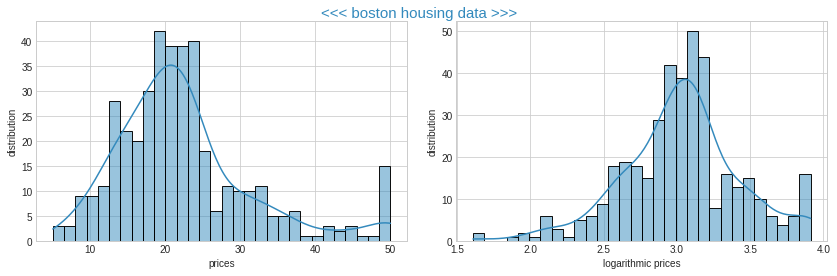

In [10]:
pl.style.use('seaborn-whitegrid')
pl.figure(1,figsize=(12,4)); pl.subplot(121)
sn.histplot(y_train,color='#348abd',bins=30,kde=True)
pl.ylabel('distribution'); pl.xlabel('prices')
pl.subplot(122)
sn.histplot(np.log(y_train),color='#348abd',bins=30,kde=True)
pl.ylabel('distribution'); pl.xlabel('logarithmic prices')
pl.suptitle('<<< boston housing data >>>',fontsize=15,color='#348abd')
pl.tight_layout(2); pl.show()

## ✒️ &nbsp;Step 2. Various Neural Networks with Keras Py
<p>Multilayer Perceptron (MLP)</p><br/>

In [11]:
def mlp_model():
    model=Sequential() 
    model.add(Dense(1024,input_dim=13))
    model.add(LeakyReLU(alpha=.025)) 
    model.add(Dense(104))     
    model.add(LeakyReLU(alpha=.025))   
    model.add(Dense(1,kernel_initializer='normal'))    
    model.compile(loss='mse',optimizer='rmsprop',metrics=['mae'])
    return model
mlp_model=mlp_model()    

In [12]:
fp='/tmp/checkpoint'
checkpointer=ModelCheckpoint(
    filepath=fp,verbose=0,save_weights_only=True,
    monitor='val_loss',mode='min',save_best_only=True)
lr_reduction=ReduceLROnPlateau(
    monitor='val_loss',patience=10,verbose=0,factor=.75)
mlp_history=mlp_model.fit(
    x_train,y_train,batch_size=14,validation_data=(x_valid,y_valid),
    epochs=300,verbose=0,callbacks=[checkpointer,lr_reduction])

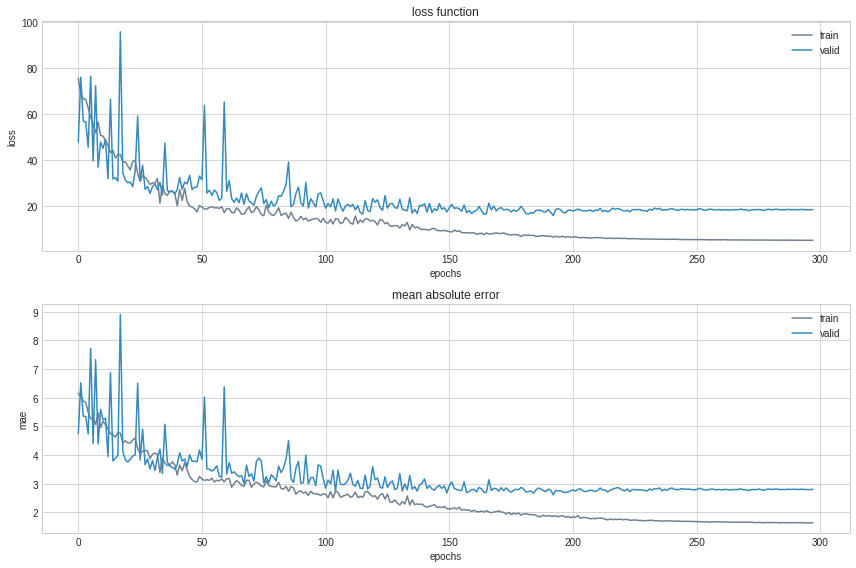

In [13]:
history_plot(mlp_history,2)

In [14]:
mlp_model.load_weights(fp)
y_train_mlp=mlp_model.predict(x_train)
y_valid_mlp=mlp_model.predict(x_valid)
y_test_mlp=mlp_model.predict(x_test)
score_train_mlp=r2_score(y_train,y_train_mlp)
score_valid_mlp=r2_score(y_valid,y_valid_mlp)
score_test_mlp=r2_score(y_test,y_test_mlp)
pd.DataFrame([['train R2 score:',score_train_mlp],
              ['valid R2 score:',score_valid_mlp],
              ['test R2 score:',score_test_mlp]])

,0,1
0,train R2 score:,0.921044
1,valid R2 score:,0.764642
2,test R2 score:,0.681555


#### Convolutional Neural Network (CNN)

In [15]:
def cnn_model():
    model=Sequential()       
    model.add(Conv1D(13,5,padding='valid',input_shape=(13,1)))
    model.add(LeakyReLU(alpha=.025))
    model.add(MaxPooling1D(pool_size=2))   
    model.add(Conv1D(128,3,padding='valid'))
    model.add(LeakyReLU(alpha=.025))
    model.add(MaxPooling1D(pool_size=2))   
    model.add(Flatten())      
    model.add(Dense(16,activation='relu',kernel_initializer='normal'))
    model.add(Dropout(.1))  
    model.add(Dense(1,kernel_initializer='normal'))  
    model.compile(loss='mse',optimizer='nadam',metrics=['mae'])
    return model
cnn_model=cnn_model()

In [16]:
checkpointer=ModelCheckpoint(
    filepath=fp,verbose=0,save_weights_only=True,
    monitor='val_loss',mode='min',save_best_only=True)
lr_reduction=ReduceLROnPlateau(
    monitor='val_loss',patience=10,verbose=0,factor=.75)
cnn_history=cnn_model.fit(
    x_train.reshape(-1,13,1),y_train, 
    validation_data=(x_valid.reshape(-1,13,1),y_valid),
    epochs=300,batch_size=14,verbose=0, 
    callbacks=[checkpointer,lr_reduction])

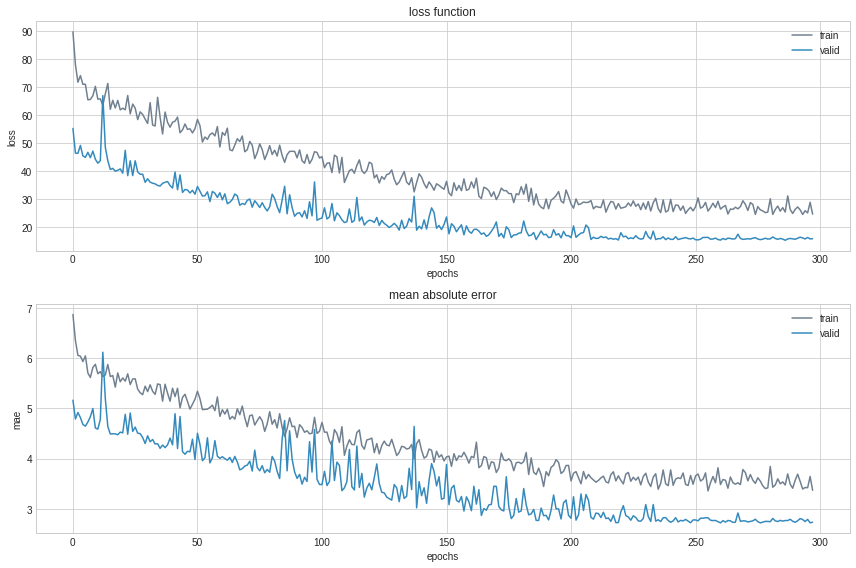

In [17]:
history_plot(cnn_history,2)

In [18]:
cnn_model.load_weights(fp)
y_train_cnn=cnn_model.predict(x_train.reshape(-1,13,1))
y_valid_cnn=cnn_model.predict(x_valid.reshape(-1,13,1))
y_test_cnn=cnn_model.predict(x_test.reshape(-1,13,1))
score_train_cnn=r2_score(y_train,y_train_cnn)
score_valid_cnn=r2_score(y_valid,y_valid_cnn)
score_test_cnn=r2_score(y_test,y_test_cnn)
pd.DataFrame([['train R2 score:',score_train_cnn],
              ['valid R2 score:',score_valid_cnn],
              ['test R2 score:',score_test_cnn]])

,0,1
0,train R2 score:,0.779817
1,valid R2 score:,0.771659
2,test R2 score:,0.663992


#### Recurrent Neural Network (RNN)

In [19]:
def rnn_model():
    model=Sequential()   
    model.add(LSTM(104,return_sequences=True,input_shape=(1,13)))
    model.add(LSTM(104,return_sequences=True))
    model.add(LSTM(104,return_sequences=False))   
    model.add(Dense(1))
    model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])       
    return model
rnn_model=rnn_model()   

In [20]:
checkpointer=ModelCheckpoint(
    filepath=fp,verbose=0,save_weights_only=True,
    monitor='val_loss',mode='min',save_best_only=True)
lr_reduction=ReduceLROnPlateau(
    monitor='val_loss',patience=10,verbose=0,factor=.75)
rnn_history=rnn_model.fit(
    x_train.reshape(-1,1,13),y_train, 
    validation_data=(x_valid.reshape(-1,1,13),y_valid),
    epochs=300,batch_size=14,verbose=0, 
    callbacks=[checkpointer,lr_reduction])

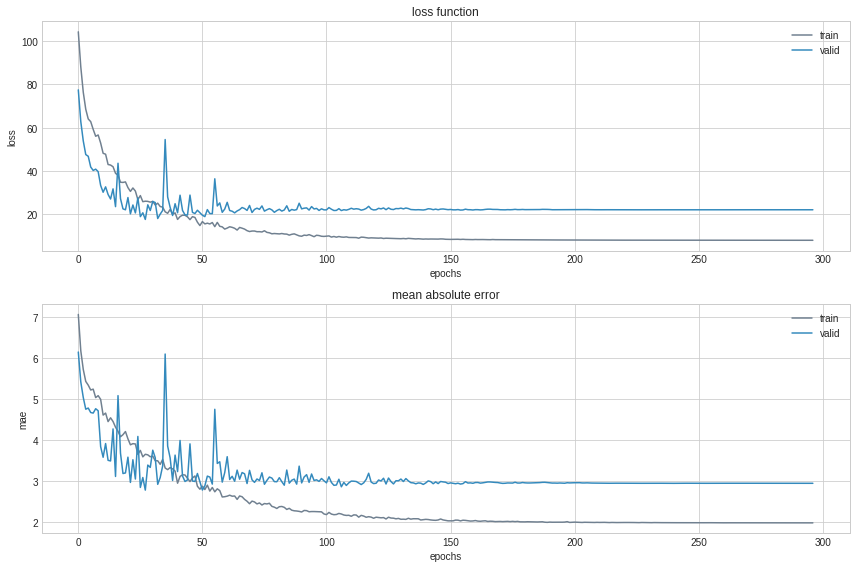

In [21]:
history_plot(rnn_history,3)

In [22]:
rnn_model.load_weights(fp)
y_train_rnn=rnn_model.predict(x_train.reshape(-1,1,13))
y_valid_rnn=rnn_model.predict(x_valid.reshape(-1,1,13))
y_test_rnn=rnn_model.predict(x_test.reshape(-1,1,13))
score_train_rnn=r2_score(y_train,y_train_rnn)
score_valid_rnn=r2_score(y_valid,y_valid_rnn)
score_test_rnn=r2_score(y_test,y_test_rnn)
pd.DataFrame([['train R2 score:',score_train_rnn],
              ['valid R2 score:',score_valid_rnn],
              ['test R2 score:',score_test_rnn]])

,0,1
0,train R2 score:,0.765770
1,valid R2 score:,0.738510
2,test R2 score:,0.671896


## ✒️ &nbsp;Step 3. Predictions of Keras Algorithms Py

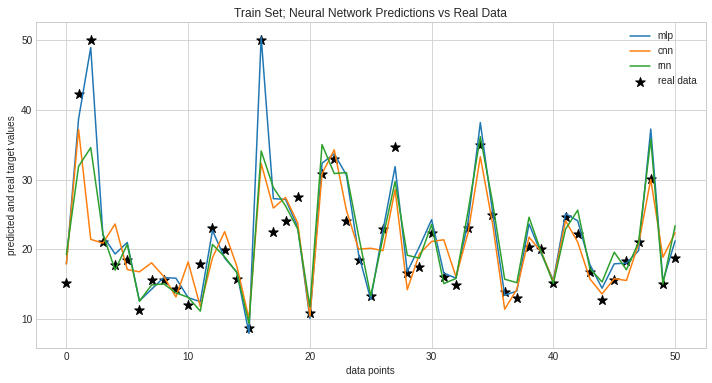

In [23]:
ti='Train Set; Neural Network Predictions vs Real Data'
predict_plot(y_train,y_train_mlp,y_train_cnn,y_train_rnn,ti)

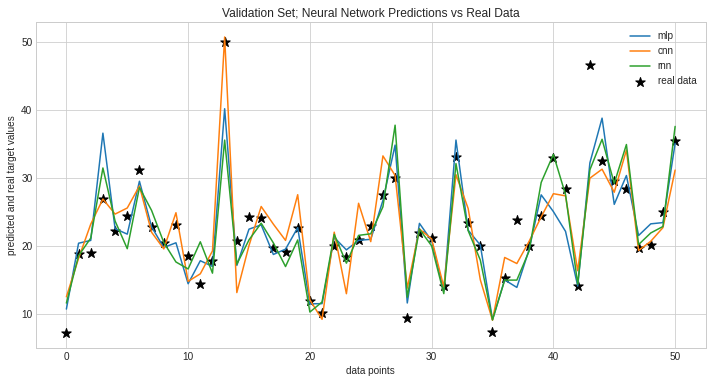

In [24]:
ti='Validation Set; Neural Network Predictions vs Real Data'
predict_plot(y_valid,y_valid_mlp,y_valid_cnn,y_valid_rnn,ti)

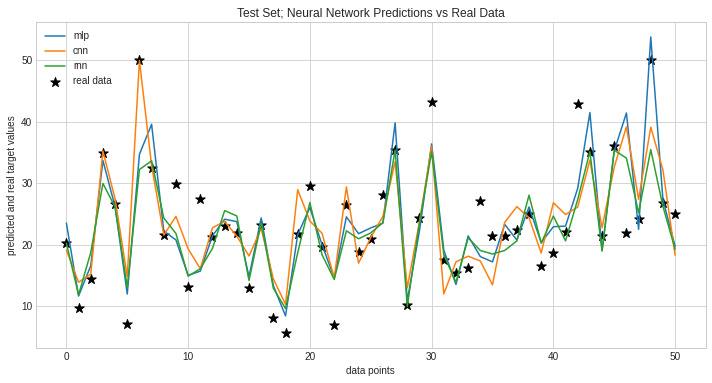

In [25]:
ti='Test Set; Neural Network Predictions vs Real Data'
predict_plot(y_test,y_test_mlp,y_test_cnn,y_test_rnn,ti)

## ✒️  Step 4. Comparing with Sklearn Algorithms Py




In [26]:
def regressor_fit_score(
    regressor,regressor_name,dataset,x_train,x_test,y_train,y_test,n=6):
    regressor_list.append(str(regressor))
    regressor_names.append(regressor_name)
    reg_datasets.append(dataset)    
    regressor.fit(x_train,y_train)
    y_reg_train=regressor.predict(x_train)
    y_reg_test=regressor.predict(x_test)    
    r2_reg_train=round(r2_score(y_train,y_reg_train),n)
    r2_train.append(r2_reg_train)
    r2_reg_test=round(r2_score(y_test,y_reg_test),n)
    r2_test.append(r2_reg_test)    
    ev_reg_train=round(explained_variance_score(y_train,y_reg_train),n)
    ev_train.append(ev_reg_train)
    ev_reg_test=round(explained_variance_score(y_test, y_reg_test),n)
    ev_test.append(ev_reg_test)    
    mse_reg_train=round(mean_squared_error(y_train,y_reg_train),n)
    mse_train.append(mse_reg_train)
    mse_reg_test=round(mean_squared_error(y_test,y_reg_test),n)
    mse_test.append(mse_reg_test)
    mae_reg_train=round(mean_absolute_error(y_train,y_reg_train),n)
    mae_train.append(mae_reg_train)
    mae_reg_test=round(mean_absolute_error(y_test,y_reg_test),n)
    mae_test.append(mae_reg_test)
    mdae_reg_train=round(median_absolute_error(y_train,y_reg_train),n)
    mdae_train.append(mdae_reg_train)
    mdae_reg_test=round(median_absolute_error(y_test,y_reg_test),n)
    mdae_test.append(mdae_reg_test)    
    return [y_reg_train,y_reg_test,r2_reg_train,r2_reg_test,
            ev_reg_train,ev_reg_test,
            mse_reg_train,mse_reg_test,mae_reg_train,mae_reg_test,
            mdae_reg_train,mdae_reg_test]
def get_regressor_results():
    return pd.DataFrame({'regressor':regressor_list,
                         'regressor_name':regressor_names,
                         'dataset':reg_datasets,
                         'r2_train':r2_train,'r2_test':r2_test,
                         'ev_train':ev_train,'ev_test':ev_test,
                         'mse_train':mse_train,'mse_test':mse_test,
                         'mae_train':mae_train,'mae_test':mae_test,
                         'mdae_train':mdae_train,'mdae_test':mdae_test})

In [27]:
(x_train,y_train),(x_test,y_test)=boston_housing.load_data()
regressor_list,regressor_names,reg_datasets=[],[],[]
r2_train,r2_test,ev_train, ev_test,mse_train,mse_test,mae_train,\
mae_test,mdae_train,mdae_test=[],[],[],[],[],[],[],[],[],[]
df_list=['regressor_name','r2_train','r2_test','ev_train','ev_test',
         'mse_train','mse_test','mae_train','mae_test',
         'mdae_train','mdae_test']
reg=[linear_model.LinearRegression(),
     linear_model.Ridge(max_iter=800),
     linear_model.RidgeCV(),
     linear_model.Lasso(max_iter=800),
     linear_model.LassoLarsCV(max_iter=800),
     linear_model.RANSACRegressor(),
     linear_model.BayesianRidge(),
     linear_model.ARDRegression(),
     linear_model.HuberRegressor(max_iter=800),
     linear_model.TheilSenRegressor(max_iter=800),
     PLSRegression(),DecisionTreeRegressor(),ExtraTreeRegressor(),
     BaggingRegressor(),AdaBoostRegressor(),
     GradientBoostingRegressor(),RandomForestRegressor(),
     linear_model.PassiveAggressiveRegressor(max_iter=800,tol=.001),
     linear_model.ElasticNet(max_iter=800),
     linear_model.SGDRegressor(max_iter=800,tol=.001),
     svm.SVR(),KNeighborsRegressor(),
     RadiusNeighborsRegressor(radius=1.5),GaussianProcessRegressor()]

In [28]:
listreg=['LinearRegression','Ridge','RidgeCV',
         'Lasso','LassoLarsCV','RANSACRegressor',
         'BayesianRidge','ARDRegression','HuberRegressor',
         'TheilSenRegressor','PLSRegression','DecisionTreeRegressor',
         'ExtraTreeRegressor','BaggingRegressor','AdaBoostRegressor',
         'GradientBoostingRegressor','RandomForestRegressor']
yreg=[]
for i in range(len(listreg)):
    yreg.append(regressor_fit_score(
        reg[i],listreg[i],'Boston',x_train,x_test,y_train,y_test)[:2])
[[y_train101,y_test101],[y_train102,y_test102],[y_train103,y_test103],
 [y_train104,y_test104],[y_train105,y_test105],[y_train106,y_test106],
 [y_train107,y_test107],[y_train108,y_test108],[y_train109,y_test109],
 [y_train110,y_test110],[y_train111,y_test111],[y_train112,y_test112],
 [y_train113,y_test113],[y_train114,y_test114],[y_train115,y_test115],
 [y_train116,y_test116],[y_train117,y_test117]]=yreg

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [29]:
df_regressor_results=get_regressor_results()
df_regressor_results.to_csv('regressor_results.csv')
df_regressor_results[df_list]\
.sort_values('r2_test',ascending=False).style.set_precision(6)

,regressor_name,r2_train,r2_test,ev_train,ev_test,mse_train,mse_test,mae_train,mae_test,mdae_train,mdae_test
15,GradientBoostingRegressor,0.980074,0.845017,0.980074,0.845570,1.686211,12.901400,1.029679,2.336357,0.911659,1.561932
16,RandomForestRegressor,0.983443,0.831142,0.983444,0.831545,1.401088,14.056395,0.793411,2.447598,0.556000,1.856500
13,BaggingRegressor,0.978403,0.812334,0.978408,0.812337,1.827622,15.622042,0.890000,2.445000,0.605000,1.760000
8,HuberRegressor,0.675381,0.769411,0.685741,0.778715,27.469977,19.195113,3.141715,3.102529,1.800117,2.252313
14,AdaBoostRegressor,0.909745,0.761925,0.916284,0.762055,7.637580,19.818293,2.272825,3.205346,2.015774,2.422667
9,TheilSenRegressor,0.686123,0.756508,0.699575,0.768748,26.560971,20.269198,3.188825,3.244775,1.875733,2.164439
10,PLSRegression,0.698820,0.736499,0.698820,0.736808,25.486528,21.934800,3.379702,3.448051,2.282466,2.830008
6,BayesianRidge,0.726385,0.735998,0.726385,0.736479,23.153945,21.976523,3.370268,3.387420,2.407641,2.199119
1,Ridge,0.736891,0.729131,0.736891,0.729157,22.264871,22.548159,3.328195,3.402405,2.481513,2.479757
4,LassoLarsCV,0.739873,0.723637,0.739873,0.723675,22.012559,23.005541,3.341610,3.449145,2.558276,2.440872


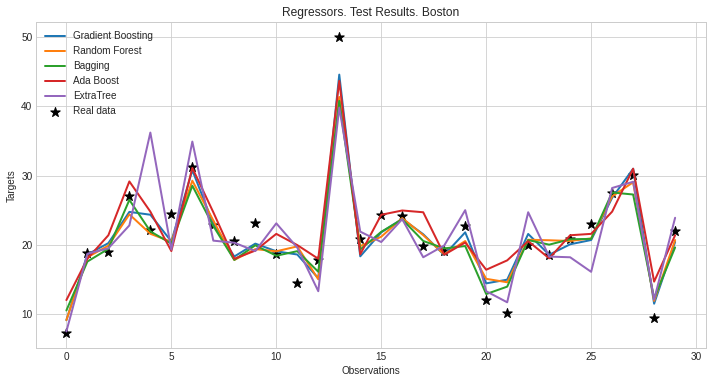

In [30]:
pl.figure(figsize=(12,6)); n=30; x=range(n)
pl.scatter(x,y_test[:n],marker='*',s=100,
           color='black',label='Real data')
pl.plot(x,y_test116[:n],lw=2,label='Gradient Boosting')
pl.plot(x,y_test117[:n],lw=2,label='Random Forest')
pl.plot(x,y_test114[:n],lw=2,label='Bagging')
pl.plot(x,y_test115[:n],lw=2,label='Ada Boost')
pl.plot(x,y_test113[:n],lw=2,label='ExtraTree')
pl.xlabel('Observations'); pl.ylabel('Targets')
pl.title('Regressors. Test Results. Boston')
pl.legend(loc=2,fontsize=10); pl.show()

## ✒️  Step 5. Neural Networks R 



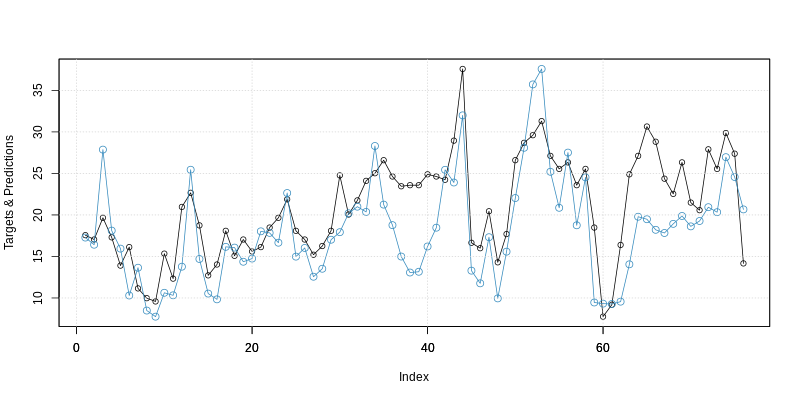

In [37]:
import warnings; warnings.filterwarnings('ignore')
from IPython import display
import rpy2.robjects as ro,pylab as pl,pandas as pd
from rpy2.robjects.packages import importr
grdevices=importr('grDevices')
grdevices.png(file='Rpy2.png',width=800,height=400)
ro.r('library("MASS"); library("nnet"); '+\
     'data(Boston); n<-dim(Boston)[1]')
ro.r('model<-nnet(as.matrix(Boston[1:430,-14]),'+\
     'as.matrix(Boston[1:430,14]),'+\
     'size=52,trace=FALSE,maxit=10^3,linout=TRUE,decay=.1^5); '+\
     'predictions<-predict(model,'+\
     'as.matrix(Boston[431:n,-14]),type="raw")')
ro.r('plot(as.matrix(Boston[431:n,14]),col="black",type="o",'+\
     'xlab="",ylab="",yaxt="n"); par(new=TRUE); '+\
     'plot(predictions,col="#348abd",type="o",'+\
     'cex=1.3,ylab="Targets & Predictions"); grid();')   
grdevices.dev_off()
display.Image('Rpy2.png')



```
%%r
library('MASS'); library('nnet')
data(Boston); n<-dim(Boston)[1];
svg(filename='Rplots.svg',width=10,height=6,pointsize=12,onefile=TRUE,
    family='times',bg='white',antialias=c('default','none','gray','subpixel'))
model<-nnet(as.matrix(Boston[1:430,-14]),as.matrix(Boston[1:430,14]),
            size=65,trace=FALSE,maxit=10^3,linout=TRUE,decay=.1^5)
predictions<-predict(model,as.matrix(Boston[431:n,-14]),type='raw')
plot(as.matrix(Boston[431:n,14]),col='black',type='o',
     xlab='',ylab='',yaxt='n'); par(new=TRUE)
plot(predictions,col='#348abd',type='o',
     cex=1.3,ylab='Targets & Predictions')
grid(); dev.off()
```



## ✒️  Addition. Combine R & Python

In [32]:
import warnings as wr; wr.filterwarnings('ignore')
from sklearn import datasets
from IPython import display
import rpy2.robjects as ro,pylab as pl,pandas as pd
from rpy2.robjects.packages import importr
from rpy2.robjects.conversion import localconverter as lc
from rpy2.robjects import r,pandas2ri
from rpy2.robjects.pandas2ri import py2rpy,rpy2py
pandas2ri.activate()

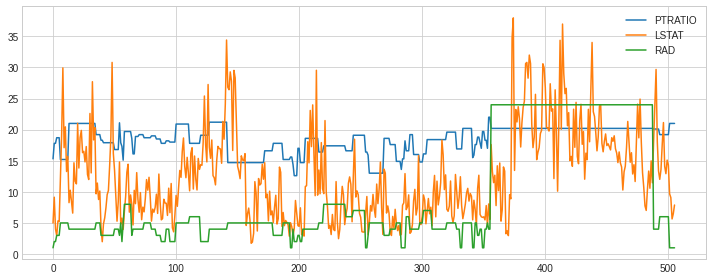

      CRIM                ZN             INDUS            CHAS        
 Min.   : 0.00632   Min.   :  0.00   Min.   : 0.46   Min.   :0.00000  
 1st Qu.: 0.08205   1st Qu.:  0.00   1st Qu.: 5.19   1st Qu.:0.00000  
 Median : 0.25651   Median :  0.00   Median : 9.69   Median :0.00000  
 Mean   : 3.61352   Mean   : 11.36   Mean   :11.14   Mean   :0.06917  
 3rd Qu.: 3.67708   3rd Qu.: 12.50   3rd Qu.:18.10   3rd Qu.:0.00000  
 Max.   :88.97620   Max.   :100.00   Max.   :27.74   Max.   :1.00000  
      NOX               RM             AGE              DIS        
 Min.   :0.3850   Min.   :3.561   Min.   :  2.90   Min.   : 1.130  
 1st Qu.:0.4490   1st Qu.:5.886   1st Qu.: 45.02   1st Qu.: 2.100  
 Median :0.5380   Median :6.208   Median : 77.50   Median : 3.207  
 Mean   :0.5547   Mean   :6.285   Mean   : 68.57   Mean   : 3.795  
 3rd Qu.:0.6240   3rd Qu.:6.623   3rd Qu.: 94.08   3rd Qu.: 5.188  
 Max.   :0.8710   Max.   :8.780   Max.   :100.00   Max.   :12.127  
      RAD              TAX 

In [33]:
#the 1st method
base=importr('base'); grdevices=importr('grDevices')
bd=datasets.load_boston()
bd=pd.DataFrame(bd.data,columns=bd.feature_names)
bd[['PTRATIO','LSTAT','RAD']].plot(kind='line',figsize=(10,4))
pl.tight_layout(); pl.show()
with lc(ro.default_converter+pandas2ri.converter):
    print(base.summary(bd))

      CRIM                ZN             INDUS            CHAS        
 Min.   : 0.00632   Min.   :  0.00   Min.   : 0.46   Min.   :0.00000  
 1st Qu.: 0.08205   1st Qu.:  0.00   1st Qu.: 5.19   1st Qu.:0.00000  
 Median : 0.25651   Median :  0.00   Median : 9.69   Median :0.00000  
 Mean   : 3.61352   Mean   : 11.36   Mean   :11.14   Mean   :0.06917  
 3rd Qu.: 3.67708   3rd Qu.: 12.50   3rd Qu.:18.10   3rd Qu.:0.00000  
 Max.   :88.97620   Max.   :100.00   Max.   :27.74   Max.   :1.00000  
      NOX               RM             AGE              DIS        
 Min.   :0.3850   Min.   :3.561   Min.   :  2.90   Min.   : 1.130  
 1st Qu.:0.4490   1st Qu.:5.886   1st Qu.: 45.02   1st Qu.: 2.100  
 Median :0.5380   Median :6.208   Median : 77.50   Median : 3.207  
 Mean   :0.5547   Mean   :6.285   Mean   : 68.57   Mean   : 3.795  
 3rd Qu.:0.6240   3rd Qu.:6.623   3rd Qu.: 94.08   3rd Qu.: 5.188  
 Max.   :0.8710   Max.   :8.780   Max.   :100.00   Max.   :12.127  
      RAD              TAX 

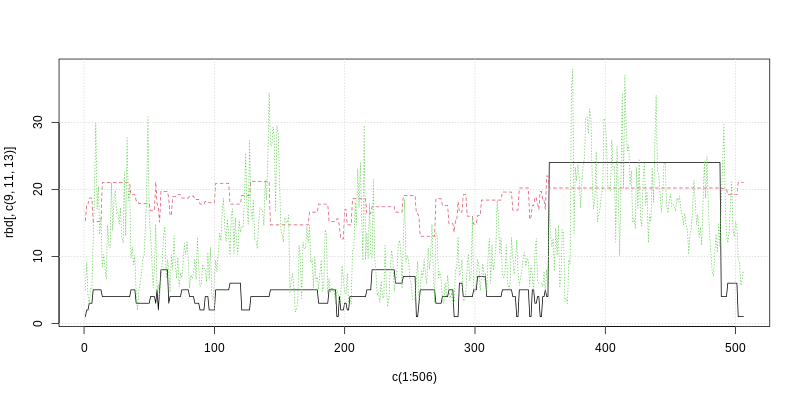

In [34]:
#the 2nd method
utils=importr('utils'); grdevices=importr('grDevices')
rbd=py2rpy(bd)
utils.write_table(rbd,file='rbd.csv',sep=',',row_names=False)
print(base.summary(rbd))
grdevices.png(file='Rpy2.png',width=800,height=400)
r('rbd<-read.csv("rbd.csv")')
r('matplot(c(1:506),rbd[,c(9,11,13)],type="l")')
r('grid()')
grdevices.dev_off(); display.Image('Rpy2.png')